# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

2023-05-10 18:01:05.986767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 18:01:06.423059: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-10 18:01:06.454008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/amoghprabhu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-10

# Preparing data

In [9]:
data_training = './Eyes/train'
data_test = './Eyes/test'

In [13]:
data_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True, 
    rotation_range=10, 
    zoom_range=0.2, 
)
train_generator = data_gen.flow_from_directory(data_training,target_size=(100,100),shuffle=True,seed=42,batch_size=100)
test_generator = data_gen.flow_from_directory(data_test,target_size=(100,100),shuffle=False,seed=42,batch_size=100)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [14]:
X,y = train_generator.__getitem__(0)

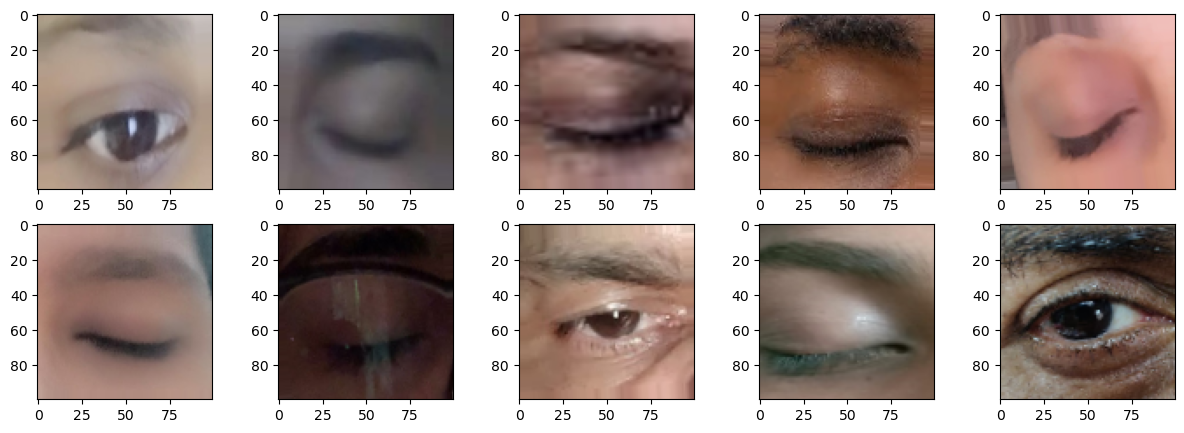

In [15]:
fig,ax = plt.subplots(2,5,figsize=(15,5))
for i,a in enumerate(ax.flatten()):
    a.imshow(X[i])

# Building our Model

In [16]:
model = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(3,3),activation='relu'),    
        Conv2D(64,kernel_size=(3,3),activation='relu'),  
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        Conv2D(128,kernel_size=(3,3),activation='relu'),  
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,   
        Dense(512,activation='relu') ,   
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(2,activation='softmax') ,    
])

2023-05-10 18:01:38.597099: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/amoghprabhu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-10 18:01:38.597153: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-10 18:01:38.597186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-05-10 18:01:38.598619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow wit

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 128)       7

##### Training model

In [20]:
history = model.fit(
    train_generator, 
    epochs=30,
    validation_data = test_generator
)

Epoch 1/30
13/13 [==============================] - 16s 1s/step - loss: 0.5875 - accuracy: 0.6904 - val_loss: 0.2198 - val_accuracy: 0.9266
Epoch 2/30
13/13 [==============================] - 14s 1s/step - loss: 0.2953 - accuracy: 0.8987 - val_loss: 0.1774 - val_accuracy: 0.9358
Epoch 3/30
13/13 [==============================] - 14s 1s/step - loss: 0.1913 - accuracy: 0.9295 - val_loss: 0.1652 - val_accuracy: 0.9174
Epoch 4/30
13/13 [==============================] - 14s 1s/step - loss: 0.1245 - accuracy: 0.9554 - val_loss: 0.2276 - val_accuracy: 0.9312
Epoch 5/30
13/13 [==============================] - 14s 1s/step - loss: 0.1031 - accuracy: 0.9571 - val_loss: 0.0988 - val_accuracy: 0.9495
Epoch 6/30
13/13 [==============================] - 14s 1s/step - loss: 0.0673 - accuracy: 0.9749 - val_loss: 0.1222 - val_accuracy: 0.9495
Epoch 7/30
13/13 [==============================] - 14s 1s/step - loss: 0.0698 - accuracy: 0.9733 - val_loss: 0.1435 - val_accuracy: 0.9404
Epoch 8/30
13/13 [==

##### Evaluate model

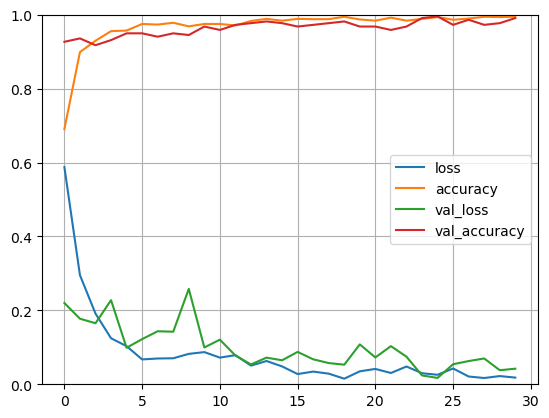

In [21]:
plt.plot(pd.DataFrame(history.history),label=history.history.keys())
plt.legend()
plt.ylim((0,1))
plt.grid()

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
predictions = model.predict(test_generator)

3/3 [==============================] - 2s 311ms/step


In [24]:
model.evaluate(test_generator)

3/3 [==============================] - 2s 336ms/step - loss: 0.0215 - accuracy: 0.9954


[0.021523749455809593, 0.9954128265380859]

In [25]:
confusion_matrix(test_generator.classes,predictions.argmax(axis=1))

array([[109,   0],
       [  3, 106]])

In [26]:
model.save("./models/eyes.h5")